In [1]:
import numpy as np, healpy as hp, pickle, curvedsky as cs, sys, local, tools_cmb, binning, plottools as pl, warnings
from matplotlib.pyplot import *
warnings.filterwarnings("ignore")

In [2]:
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/actsims/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/soapack/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/orphics/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/tilec/")
from pixell import enmap
from soapack import interfaces

In [3]:
qids = local.qid_all

In [6]:
aobj = {q: local.init_analysis_params(qid=q,ascale=3.,wtype='com16vc') for q in qids}

In [7]:
ivar = tools_cmb.load_window_curvedsky(aobj['boss_01'])

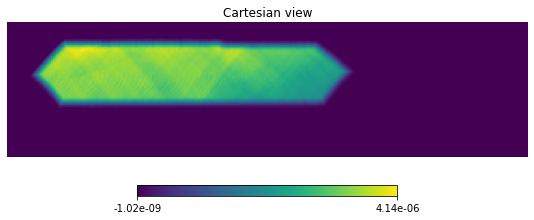

In [8]:
hp.cartview(ivar,lonra=[143,247],latra=[-5,22],title='joint ivar for s15+s16')

In [9]:
aobj = {q: local.init_analysis_params(qid=q,ascale=3.,wtype='iso15vc') for q in qids}

fsky 0.02704342206319173


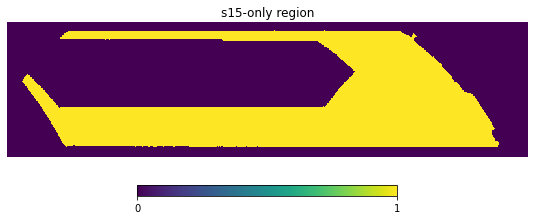

In [14]:
s15 = tools_cmb.load_window_curvedsky(aobj['boss_01'])
s15[s15!=0] = 1.
print('fsky',np.average(s15))
hp.cartview(s15,lonra=[143,247],latra=[-5,22],title='s15-only region')

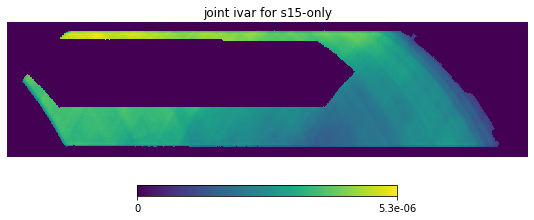

In [15]:
ivar = hp.fitsfunc.read_map(aobj['boss_01'].fivar15)
hp.cartview(ivar*s15,lonra=[143,247],latra=[-5,22],title='joint ivar for s15-only')

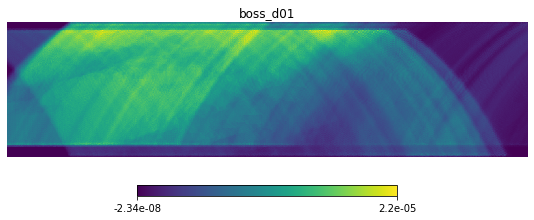

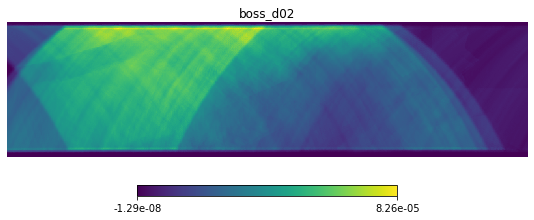

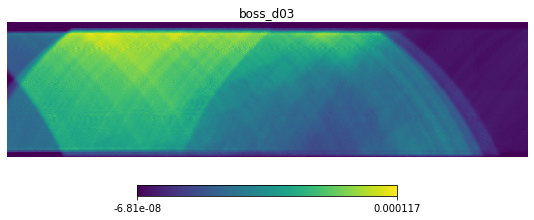

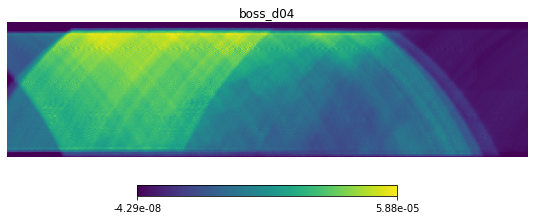

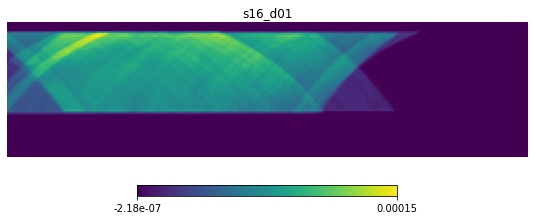

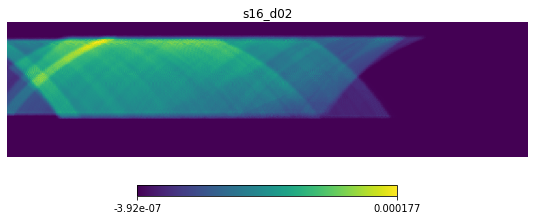

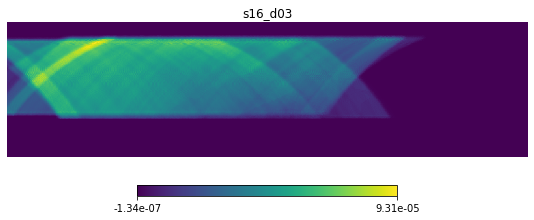

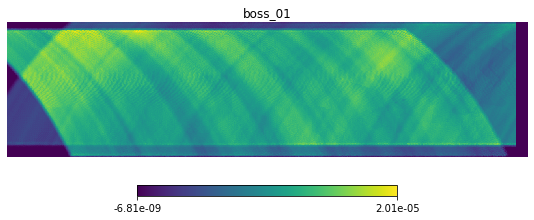

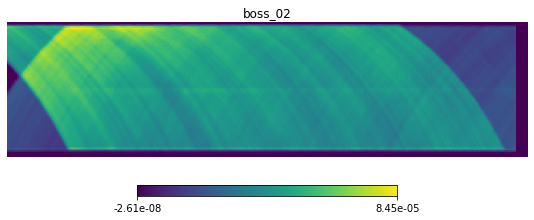

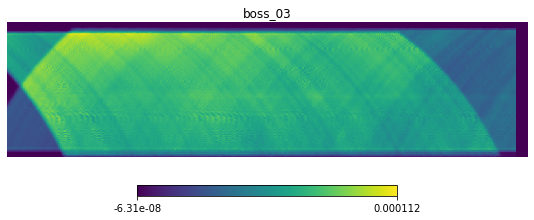

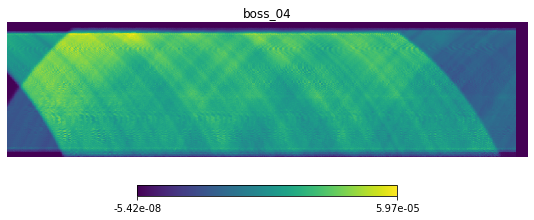

In [16]:
ivar = {}
for q in qids:
    aobj = {q: local.init_analysis_params(qid=q,ascale=3.) for q in qids}
    ivar[q] = tools_cmb.load_ivar_curvedsky(aobj[q])
    hp.cartview(ivar[q],lonra=[143,247],latra=[-5,22],title=q)
    show()

0.045780440171559654
0.020444929599761963
0.045780440171559654


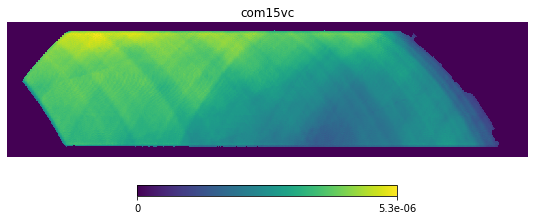

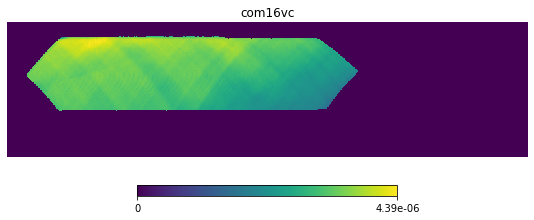

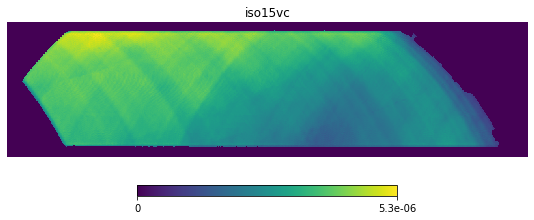

In [18]:
for w in ['com15vc','com16vc','iso15vc']:
    aobj = local.init_analysis_params(qid='boss_d03',ascale=3.,wtype=w)
    ivar = tools_cmb.load_ivar_curvedsky(aobj)
    hp.cartview(ivar,lonra=[143,247],latra=[-5,22],title=w)
    ivar[ivar!=0] = 1.
    print(np.average(ivar))